In [1]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

In [2]:
file = pickle.load(open('TE_ML_Data_pickle.p','rb'))

list(map(len,file))

[109, 109, 109]

In [3]:
X,y = file[1],file[2]

In [4]:
def pca(X_arr,components):
    pca = PCA(n_components=components)
    pca.fit(X_arr)
    X_pca_arr = pca.transform(X_arr)  
    return X_pca_arr

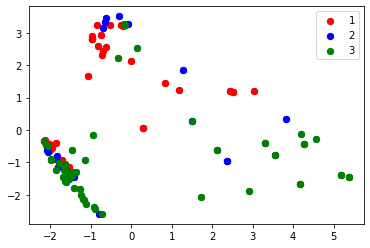

In [5]:
X_pca = pca(X,2)

fig = plt.figure()
ax = fig.add_subplot(111)

group = y
cdict = {1:'red',2:'blue',3:'green'}

plt.scatter(X_pca[:,0],X_pca[:,1])

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(X_pca[:,0][ix], X_pca[:,1][ix], c = cdict[g], label = g, s = 40)
ax.legend()

In [6]:
diff_val = [len(np.nonzero(file[1][i]-file[1][j])[0]) for i in range(27,73) for j in range(27,73)]

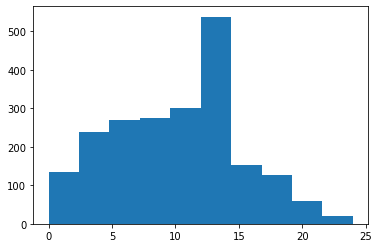

In [7]:
plt.hist(diff_val);

In [8]:
np.mean(diff_val)

10.039697542533082

In [9]:
file[0][27:73]

array(['Cuphea_viscosisssima_(CvB2MT1', 'Cuphea_viscosisssima_(CvB2MT10',
       'Cuphea_viscosisssima_(CvB2MT11', 'Cuphea_viscosisssima_(CvB2MT12',
       'Cuphea_viscosisssima_(CvB2MT13', 'Cuphea_viscosisssima_(CvB2MT14',
       'Cuphea_viscosisssima_(CvB2MT15', 'Cuphea_viscosisssima_(CvB2MT16',
       'Cuphea_viscosisssima_(CvB2MT17)',
       'Cuphea_viscosisssima_(CvB2MT18', 'Cuphea_viscosisssima_(CvB2MT19',
       'Cuphea_viscosisssima_(CvB2MT2', 'Cuphea_viscosisssima_(CvB2MT20',
       'Cuphea_viscosisssima_(CvB2MT21', 'Cuphea_viscosisssima_(CvB2MT22',
       'Cuphea_viscosisssima_(CvB2MT23', 'Cuphea_viscosisssima_(CvB2MT24',
       'Cuphea_viscosisssima_(CvB2MT25)',
       'Cuphea_viscosisssima_(CvB2MT26', 'Cuphea_viscosisssima_(CvB2MT27',
       'Cuphea_viscosisssima_(CvB2MT28', 'Cuphea_viscosisssima_(CvB2MT29',
       'Cuphea_viscosisssima_(CvB2MT3', 'Cuphea_viscosisssima_(CvB2MT30',
       'Cuphea_viscosisssima_(CvB2MT31', 'Cuphea_viscosisssima_(CvB2MT32',
       'Cuphea_visc

In [10]:
file[2][27:73]

array([3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 2, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 1], dtype=int32)

In [11]:
def get_classifier_score(X,y,c,k):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    pca = PCA(n_components=60)
    pca.fit(X_train)
    Xtrain = pca.transform(X_train)
    Xtest = pca.transform(X_test)
    clf = SVC(C = c,kernel=k,gamma='scale',tol=1e-6,class_weight='balanced')
    clf.fit(Xtrain,y_train)
    y_pred_train = clf.predict(Xtrain)
    y_pred_test = clf.predict(Xtest)
    return accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)

In [12]:
f1_scores = []

for i in range(1000):
    f1_sc = get_classifier_score(X,y,1.3,'rbf')
    f1_scores.append(f1_sc)

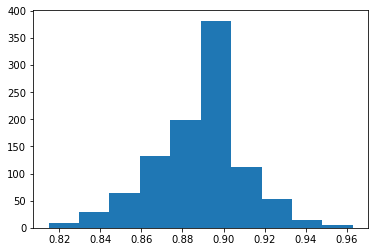

In [13]:
plt.hist([f[0] for f in f1_scores]);

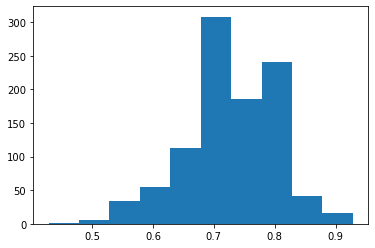

In [14]:
plt.hist([f[1] for f in f1_scores]);